In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
file_path = '/content/Sales_Data.csv'
sales_df = pd.read_csv(file_path)
sales_df.head()

,CloseDate,ClosePrice
0,11/17/2017,120000
1,01/25/2018,115000
2,02/02/2018,125000
3,02/08/2018,116000
4,02/26/2018,96500


In [3]:
sales_df.describe()

,ClosePrice
count,232.000000
mean,127848.370690
std,25236.451187
min,68000.000000
25%,112375.000000
50%,125000.000000
75%,140000.000000
max,205000.000000


In [4]:
sales_df = sales_df[['CloseDate','ClosePrice']]
sales_df.head()

,CloseDate,ClosePrice
0,11/17/2017,120000
1,01/25/2018,115000
2,02/02/2018,125000
3,02/08/2018,116000
4,02/26/2018,96500


In [5]:
sales_df.dtypes

CloseDate     object
ClosePrice     int64
dtype: object

In [6]:
sales_df['Year'] = sales_df['CloseDate'].apply(lambda x: str(x)[-4:])
sales_df['Month'] = sales_df['CloseDate'].apply(lambda x: str(x)[:-8])
sales_df['Day'] = sales_df['CloseDate'].apply(lambda x: str(x)[-7:-5])
sales_df['ds'] = pd.DatetimeIndex(sales_df['Year'] +'-'+ sales_df['Month'] +'-'+ sales_df['Day'])
sales_df.head()

,CloseDate,ClosePrice,Year,Month,Day,ds
0,11/17/2017,120000,2017,11,17,2017-11-17
1,01/25/2018,115000,2018,01,25,2018-01-25
2,02/02/2018,125000,2018,02,02,2018-02-02
3,02/08/2018,116000,2018,02,08,2018-02-08
4,02/26/2018,96500,2018,02,26,2018-02-26


In [7]:
sales_df.dtypes

CloseDate             object
ClosePrice             int64
Year                  object
Month                 object
Day                   object
ds            datetime64[ns]
dtype: object

In [8]:
sales_df.drop(['CloseDate','Year','Month','Day'], axis=1,inplace=True)
sales_df.head()

,ClosePrice,ds
0,120000,2017-11-17
1,115000,2018-01-25
2,125000,2018-02-02
3,116000,2018-02-08
4,96500,2018-02-26


In [9]:
sales_df.rename({'ClosePrice':'y'}, axis='columns', inplace = True)
sales_df.head()

,y,ds
0,120000,2017-11-17
1,115000,2018-01-25
2,125000,2018-02-02
3,116000,2018-02-08
4,96500,2018-02-26


In [10]:
m = Prophet(yearly_seasonality=True) #Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(sales_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-17,102584.711188,87858.516581,128007.055202,102584.711188,102584.711188,3739.950013,3739.950013,3739.950013,1998.311766,1998.311766,1998.311766,1741.638247,1741.638247,1741.638247,0.0,0.0,0.0,106324.661201
1,2018-01-25,103823.807021,91062.161049,131967.418904,103823.807021,103823.807021,8830.911763,8830.911763,8830.911763,4345.905681,4345.905681,4345.905681,4485.006083,4485.006083,4485.006083,0.0,0.0,0.0,112654.718784
2,2018-02-02,103967.470306,88997.773038,129818.023400,103967.470306,103967.470306,6767.770197,6767.770197,6767.770197,1998.311766,1998.311766,1998.311766,4769.458431,4769.458431,4769.458431,0.0,0.0,0.0,110735.240502
3,2018-02-08,104075.217769,90353.823830,127991.549556,104075.217769,104075.217769,5639.382707,5639.382707,5639.382707,4345.905681,4345.905681,4345.905681,1293.477026,1293.477026,1293.477026,0.0,0.0,0.0,109714.600476
4,2018-02-26,104398.460160,84038.539561,125013.411269,104398.460160,104398.460160,-183.883847,-183.883847,-183.883847,1447.708680,1447.708680,1447.708680,-1631.592527,-1631.592527,-1631.592527,0.0,0.0,0.0,104214.576313


In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
289,2022-02-12,178023.825893,132600.436117,174589.188089,177694.989033,178335.852437,-23961.296699,-23961.296699,-23961.296699,-22692.125474,-22692.125474,-22692.125474,-1269.171225,-1269.171225,-1269.171225,0.0,0.0,0.0,154062.529194
290,2022-02-13,178119.544504,164252.968371,205115.105798,177782.785755,178435.603648,6864.072410,6864.072410,6864.072410,8665.040878,8665.040878,8665.040878,-1800.968467,-1800.968467,-1800.968467,0.0,0.0,0.0,184983.616914
291,2022-02-14,178215.263114,158477.800671,198367.451953,177872.217622,178535.118209,-817.109850,-817.109850,-817.109850,1447.708680,1447.708680,1447.708680,-2264.818530,-2264.818530,-2264.818530,0.0,0.0,0.0,177398.153264
292,2022-02-15,178310.981725,162533.689473,199605.481244,177961.458112,178633.987701,2956.486892,2956.486892,2956.486892,5608.309903,5608.309903,5608.309903,-2651.823011,-2651.823011,-2651.823011,0.0,0.0,0.0,181267.468617
293,2022-02-16,178406.700335,154704.649559,195308.501940,178051.007170,178733.329070,-2328.492273,-2328.492273,-2328.492273,626.848567,626.848567,626.848567,-2955.340840,-2955.340840,-2955.340840,0.0,0.0,0.0,176078.208062


In [13]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-11-17,106324.661201
1,2018-01-25,112654.718784
2,2018-02-02,110735.240502
3,2018-02-08,109714.600476
4,2018-02-26,104214.576313
...,...,...
289,2022-02-12,154062.529194
290,2022-02-13,184983.616914
291,2022-02-14,177398.153264
292,2022-02-15,181267.468617


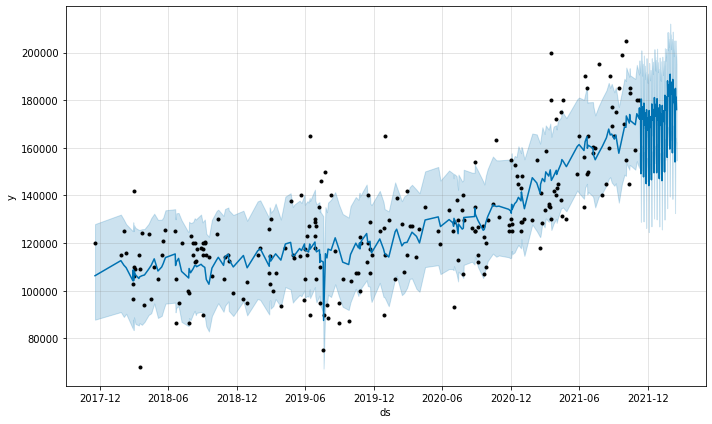

In [14]:
plot1 = m.plot(forecast)

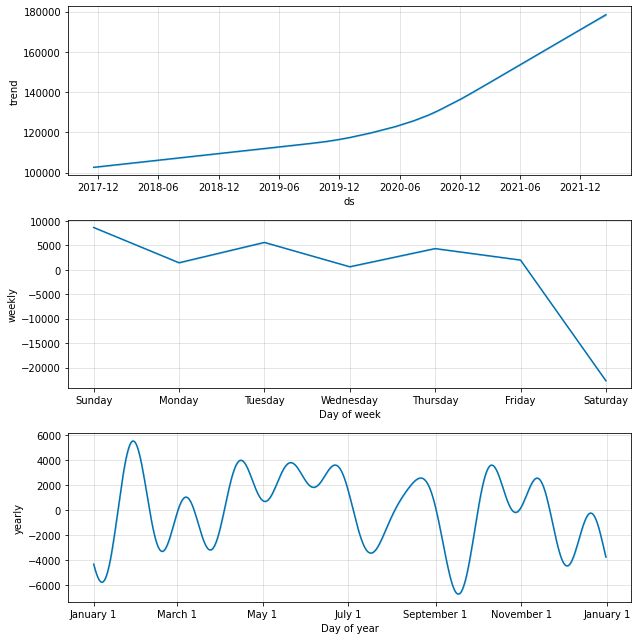

In [15]:
plot2 = m.plot_components(forecast)